In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt


In [2]:

img = cv2.imread(r"Image Dataset\Image Dataset\Database images (Neg)\DB11.bmp")


In [3]:
def convert_to_gray(img):
	b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
	gray = r * 0.299 + g * 0.587 +  b * 0.114
	# print(gray[0:5])
	gray_new = np.rint(gray)
	# print(gray_new[0:5])
	gray_new = gray_new.astype(np.int8)
	return gray_new


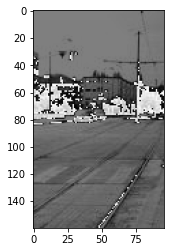

In [4]:
grayImg = convert_to_gray(img)
plt.imshow(grayImg, cmap='gray')

In [5]:
def convolution(imgInput, kernel):
    """Function to perform convolution on the image.
    Param : imgInput - input image (numpy array)
    kernel : filter / kernel (numpy array)
    Return : imgWithConvolution (numpy array)
    """
    ## get image size
    image_h = imgInput.shape[0]
    image_w = imgInput.shape[1]
    
    ## getting kernel shape    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    ## Calculate kernel half sizes for accomodating the border where kernel goes out of image bourndries
    h = kernel_h // 2
    w = kernel_w // 2
    
    ## Initialize output image with zero values
    image_conv = np.zeros(imgInput.shape)
    
    ## Perform convolution
    for i in range(h, image_h-h):        
        for j in range(w, image_w-w):
            x = imgInput[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            # multiply with the kernel
            
            x = x.flatten()*kernel.flatten()
            # assign mulitplied output of kernel to the pixel
            # print(x)
            image_conv[i][j] = x.sum()

    ## At the boundries where kernel goes out of image, set values as undefineed i.e. np.NaN
    image_conv[:h,:] = np.NaN
    image_conv[image_h-h:,:] = np.NaN
    image_conv[:,:w] = np.NaN
    image_conv[:,image_w-w:] = np.NaN
    # print(image_conv[0:2,0:2])
    # print(image_conv[h:h+2,w:w+2])
   

    return image_conv

In [6]:
filter_sobel_hor = np.array([[-1,-2,-1],
                             [0,0,0],
                             [1,2,1]])

filter_sobel_ver = np.array([[-1,0,1],
                             [-2,0,2],
                             [-1,0,1]])


#### Computing Gradients Gx and Gy

Text(0.5, 1.0, 'Vertical gradient Gy')

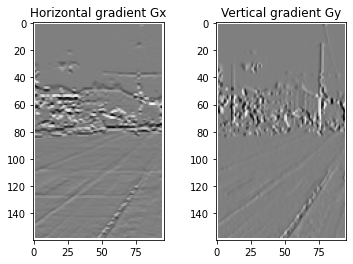

In [7]:
Gx = convolution(grayImg, filter_sobel_hor)
Gy = convolution(grayImg, filter_sobel_ver)

plt.subplot(1,2,1)
plt.imshow(Gx, cmap='gray')
plt.title("Horizontal gradient Gx")
plt.subplot(1,2,2)
plt.imshow(Gy, cmap='gray')
plt.title("Vertical gradient Gy")

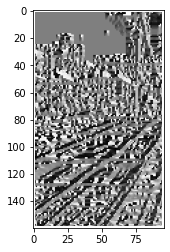

In [46]:
grad_angle = np.arctan2(Gy,Gx)*(180/np.pi)
plt.imshow(grad_angle, cmap='gray')

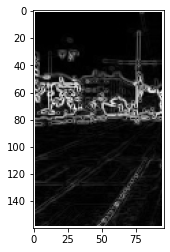

In [10]:
mag = (Gx**2 + Gy**2)**(1/2)
plt.imshow(mag, cmap='gray')

In [11]:
print(np.unique(mag))
print(np.min(mag))
print(np.average(mag))
mag.shape

[   0.            1.41421356    2.         ... 1084.77186542 1085.52752153
           nan]
nan
nan


(160, 96)

In [12]:
### Normalizing gradient magnitude within range 0 to 255

mag[mag==np.nan] = 0

In [13]:
print(np.unique(mag))

[   0.            1.41421356    2.         ... 1084.77186542 1085.52752153
           nan]


In [17]:
mag = np.nan_to_num(mag)

In [19]:
np.min(mag), np.max(mag)

(0.0, 1085.527521530431)

In [20]:
mag_new = mag.copy()

In [21]:
mag_new = mag_new / np.max(mag) * 255

In [23]:
np.unique(mag_new)

array([  0.        ,   0.33221125,   0.46981766, ..., 249.61249124,
       254.82248971, 255.        ])

In [24]:
mag_new = mag_new.astype(np.uint8)

In [25]:
np.unique(mag_new)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

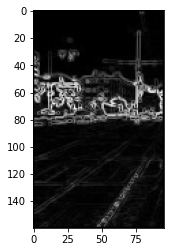

In [26]:
plt.imshow(mag_new, cmap='gray')

In [ ]:
### Assign mag and angle as 0 where Gx and Gy both are 0  ## remaining


## Normalized HOG features

In [38]:
def quantize_unsigned(angle, no_of_bins=9):
    bin_size = 180 / no_of_bins
    bin_index = int(angle //bin_size)
    return bin_index


In [43]:
def quantize_signed(angle, no_of_bins=9):
    bin_size = 360 / no_of_bins
    bin_index = int((angle+180) //bin_size)
    return bin_index

In [47]:
np.unique(grad_angle)
grad_angle_copy = grad_angle.copy()

In [48]:
grad_angle_copy = np.nan_to_num(grad_angle_copy)
np.unique(grad_angle_copy)

array([-179.88517895, -179.71494872, -179.68345195, ...,  179.8670634 ,
        179.87267626,  180.        ])

In [49]:
gradient_angles_cell = grad_angle_copy[24:24+8, :8]
gradient_angles_cell.flatten()

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  180.        , -155.55604522,  167.00538321,
        135.        , -135.        , -161.56505118,  161.56505118,
          0.        ,  143.13010235, -101.30993247,  120.96375653,
        111.80140949, -135.        , -146.30993247,  113.19859051,
          0.        ,   80.53767779,  -63.43494882,    0.        ,
        125.53767779, -144.46232221,  180.        ,   74.7448813 ,
          0.        ,  104.03624347, -135.        , -161.56505118,
         98.13010235,  -45.        ,   45.        ,   78.69006753,
          0.        ,  149.30027745,  154.98310652,   45.        ,
         59.03624347,    0.        ,   14.03624347,   63.43494882,
          0.        ,  149.60127229,  158.55226367,  149.03624347,
        120.96375653,   90.        ,    0.        ,    0.        ,
          0.        ,  157.83365418,  161.38141149,  139.02199

In [56]:
quantized_angles = [quantize_signed(angle) for angle in gradient_angles_cell.flatten()]

In [57]:
set(quantized_angles)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
def get_single_cell_hist(cell):

    hist = np.histogram(cell)

    plt.hist(cell,bins=)

In [59]:
# Create histogram of gradients
num_bins = 10
histogram = np.zeros(num_bins, dtype=int)
for angle in quantized_angles:
    histogram[angle] += 1


In [60]:
histogram

array([ 5,  4,  1,  1, 20,  3,  7, 10, 10,  3])

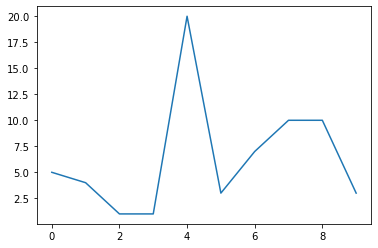

In [65]:
plt.plot(histogram)

In [ ]:
## Histogram intersection
import numpy as np

def histogram_intersection(hist1, hist2):
    minima = np.minimum(hist1, hist2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist2))
    return intersection

# Example histograms
hist1 = np.array([1, 2, 3, 4, 5])
hist2 = np.array([2, 3, 4, 5, 6])

# Calculate histogram intersection
intersection = histogram_intersection(hist1, hist2)
print("Histogram intersection:", intersection)

In [ ]:
## Helinger distance
import numpy as np

def hellinger_distance(p, q):
    # Calculate the square root of the element-wise product of p and q
    sqrt_pq = np.sqrt(np.multiply(p, q))
    # Calculate the Hellinger distance
    distance = np.sqrt(0.5 * np.sum((sqrt_pq - np.sqrt(p*q))**2))
    return distance

# Example probability distributions
p = np.array([0.2, 0.3, 0.5])
q = np.array([0.1, 0.5, 0.4])

# Calculate Hellinger distance
distance = hellinger_distance(p, q)
print("Hellinger distance:", distance)